<a href="https://colab.research.google.com/github/dataSci-rigo/facial_feature_estimation_from_scratch/blob/master/TPU_keras_facial_features_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
!pip install pillow
np.random.seed(0)
import tensorflow as tf
from  tensorflow import keras
import keras.callbacks as callbacks

from keras.callbacks import EarlyStopping 

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#drive=GoogleDrive(4/iQEapMjjZP0ngyzZdGQsb1VhT8Hy3GEhw3R3CHr4yo4GFPHi08aFUUk)

In [0]:
test_shareable_link="https://drive.google.com/file/d/1HB3mJo_2EVewP9oqHtlcDCfw6y01om63/view?usp=sharing"
train_shareable_link='https://drive.google.com/file/d/1DiE4w94eJDEXxn87npDd5o6Y3QFdzzIU/view?usp=sharing'

test_csv_link = 'https://drive.google.com/open?id=1HB3mJo_2EVewP9oqHtlcDCfw6y01om63' # shareable link
train_csv_link = 'https://drive.google.com/open?id=1DiE4w94eJDEXxn87npDd5o6Y3QFdzzIU' # shareable link

_, test_id = test_csv_link.split('=')
_, train_id = train_csv_link.split('=')
# print (test_id) # Verify that you have everything after '='
# print (train_id) # Verify that you have everything after '='

downloaded_test = drive.CreateFile({'id':test_id})
downloaded_train = drive.CreateFile({'id':train_id}) 
downloaded_test.GetContentFile('test.csv')
downloaded_train.GetContentFile('train.csv')

# **EDA**

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("train shape: {}".format(train_df.shape))
print("test shape: {}".format(test_df.shape))

# Convert Image from string to np array of floats between 0 and 1
train_df.Image = train_df.Image.apply(lambda x: np.array(object=x.split(' '), 
                                                         dtype=float)) / 255
test_df.Image = test_df.Image.apply(lambda x: np.array(object=x.split(' '), 
                                                       dtype=float)) / 255

train shape: (7049, 31)
test shape: (1783, 2)


In [0]:
#!pip install impyute
#from impyute.imputation.cs import mice

# start the MICE training

#imputed_training_mice=mice(train_features_cnn.astype(float))



In [0]:
def plot_test_multiple(predicted_points,image, pics):
  '''shows predicted features on image
  
  requires:
  - test_images'''
  x_points = []
  y_points = []

  # split into x coords and y coords
  
  for index, pic in enumerate(pics):
    for i in range(15):
      x_points.append(predicted_points[pic][i*2])
      y_points.append(predicted_points[pic][i*2+1])

    ax = plt.subplot(1,len(pics),index+1)
    ax.imshow(image[pic].reshape(96,96),cmap='gray')
    ax.scatter(x=x_points, y=y_points, c='r', s=20)

## **Forward Fill Missing Data**

Since the data has multiple columns of missing information we are going to input them using the forward fill method.

In [0]:


train_images_dirty=np.concatenate(np.array(train_df.Image.values)).ravel().reshape(train_df.shape[0],96,96,1)
train_features_dirty=np.array(train_df.values)[:,0:30]

train_df_clean=train_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
test_df_clean=test_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
train_images_clean=np.concatenate(np.array(train_df_clean.Image.values)).ravel().reshape(train_df_clean.shape[0],96,96,1)
train_features_clean=np.array(train_df_clean.values)[:,0:30]

#"There may be regression problems in which the target value has a spread of values and when predicting a large value, you may not want to punish a model as heavily as mean squared error."
# 'mean_squared_logarithmic_error'

'''DataFrame.fillna(self, value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)'''
train_df_neg=train_df.fillna(value=0)
test_df_neg=test_df.fillna(value=0)
test_images_zero=np.concatenate(np.array(test_df_neg["Image"].values)).ravel().reshape(test_df_neg.shape[0],96,96,1)
train_images_zero=np.concatenate(np.array(train_df_neg.Image.values)).ravel().reshape(train_df_neg.shape[0],96,96,1)
train_features_zero=np.array(train_df_neg.values)[:,0:30]



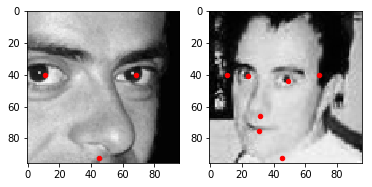

In [0]:
image=[2289,2284]; plot_test_multiple(train_features_dirty,train_images_dirty, image)


# **Split train into train/dev sets**

# **keras Model**


### keras Model

In [0]:
#!pip install pyyaml
#!pip install tensorflow --upgrade
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
#! pip install keras --upgrade

from tensorflow.keras.models import save_model, load_model
#save_model(model,'124446.model')
from tensorflow.keras import layers
from tensorflow.keras import Model


from google.colab import files
from tensorflow.keras import callbacks

Tensor("Sum:0", shape=(), dtype=float32)


In [0]:
%pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 282kB/s 
     |████████████████████████████████| 3.2MB 36.8MB/s 
     |████████████████████████████████| 368kB 48.8MB/s 
ERROR: tensorflow-gpu 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow-gpu 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
def get_Model():
  inputs=layers.Input(shape=(96, 96, 1))
  batch=layers.BatchNormalization(input_shape=(96, 96, 1))(inputs)
  layer1_1=layers.Conv2D(24, (5, 5), padding="same", kernel_initializer='he_normal', activation='relu', input_shape=(96, 96, 1),data_format="channels_last")(batch)
  layer1_2=layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(layer1_1)

  layer2_1=layers.Conv2D(36,(5,5), activation='relu')(layer1_2)
  layer2_2=layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(layer2_1)

  layer3_1=layers.Conv2D(48,(5,5) , activation='relu')(layer2_2)
  layer3_2=layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(layer3_1)

  layer4_1=layers.Conv2D(64,(3,3) , activation='relu')(layer3_2)
  layer4_2=layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(layer4_1)

  layer5_1=layers.Conv2D(64,(3,3), activation='relu')(layer4_2)
  layer5_2=layers.GlobalAveragePooling2D()(layer5_1)

  layerD_1=layers.Dense(500, activation='relu')(layer5_2)
  layerD_2=layers.Dense(90, activation='relu')(layerD_1)
  out=layers.Dense(30)(layerD_2)
 
  return Model(inputs=inputs,outputs=out)

In [0]:
def get_sequential_model():
  model = layers.Sequential([

  layers.BatchNormalization(input_shape=(96, 96, 1)),
  layers.Conv2D(24, (5, 5), padding="same", kernel_initializer='he_normal', activation='relu', input_shape=(96, 96, 1),data_format="channels_last"),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

  layers.Conv2D(36,(5,5), activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

  layers.Conv2D(48,(5,5) , activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

  layers.Conv2D(64,(3,3) , activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

  layers.Conv2D(64,(3,3), activation='relu') ,
  layers.GlobalAveragePooling2D(),

  layers.Dense(500, activation='relu'),
  layers.Dense(90, activation='relu'),
  layers.Dense(30)
  ])
  return model

In [0]:
model_drop_na=get_Model()
Adam=tf.train.AdamOptimizer(0.001)
#(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

file_checkpoint_name='face_model-adam-mse-lr001-dropna.h5'

model_drop_na.compile(optimizer=Adam, loss='mean_squared_error', metrics=['acc','mse'])


checkpointer = callbacks.ModelCheckpoint(filepath=file_checkpoint_name, verbose=1, save_best_only=True)

epochs = 30
history=model_drop_na.fit(train_images_clean, train_features_clean,  validation_split=0.2, batch_size=32,epochs=epochs, callbacks=[checkpointer], verbose=1)
#history = model_drop_na.fit(train_images_clean, train_features_clean, validation_split=0.2, shuffle=True, epochs=epochs, batch_size=30, callbacks=[checkpointer], verbose=1)

#files.download(file_checkpoint_name) 

W0826 22:17:19.473939 140326085265280 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 1712 samples, validate on 428 samples
Epoch 1/30
1696/1712 [============================>.] - ETA: 0s - loss: 549.1911 - acc: 0.4251 - mean_squared_error: 549.1909

W0826 22:17:54.466754 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00001: val_loss improved from inf to 1119.43298, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 544.9757 - acc: 0.4276 - mean_squared_error: 544.9755 - val_loss: 1119.4330 - val_acc: 0.4322 - val_mean_squared_error: 1119.4330
Epoch 2/30
1696/1712 [============================>.] - ETA: 0s - loss: 93.0681 - acc: 0.7730 - mean_squared_error: 93.0681

W0826 22:18:28.702998 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00002: val_loss improved from 1119.43298 to 757.78213, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 92.7270 - acc: 0.7734 - mean_squared_error: 92.7270 - val_loss: 757.7821 - val_acc: 0.4322 - val_mean_squared_error: 757.7820
Epoch 3/30
1696/1712 [============================>.] - ETA: 0s - loss: 72.8246 - acc: 0.7742 - mean_squared_error: 72.8246

W0826 22:19:02.841443 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00003: val_loss improved from 757.78213 to 585.10687, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 72.9115 - acc: 0.7734 - mean_squared_error: 72.9115 - val_loss: 585.1069 - val_acc: 0.4322 - val_mean_squared_error: 585.1068
Epoch 4/30
1696/1712 [============================>.] - ETA: 0s - loss: 56.1148 - acc: 0.7718 - mean_squared_error: 56.1148

W0826 22:19:36.951254 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00004: val_loss improved from 585.10687 to 432.66493, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 55.9938 - acc: 0.7734 - mean_squared_error: 55.9938 - val_loss: 432.6649 - val_acc: 0.4322 - val_mean_squared_error: 432.6649
Epoch 5/30
1696/1712 [============================>.] - ETA: 0s - loss: 46.6147 - acc: 0.7742 - mean_squared_error: 46.6147

W0826 22:20:10.943839 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00005: val_loss improved from 432.66493 to 409.56760, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 46.4856 - acc: 0.7734 - mean_squared_error: 46.4856 - val_loss: 409.5676 - val_acc: 0.4322 - val_mean_squared_error: 409.5676
Epoch 6/30
1696/1712 [============================>.] - ETA: 0s - loss: 39.1031 - acc: 0.7730 - mean_squared_error: 39.1031

W0826 22:20:45.119473 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00006: val_loss improved from 409.56760 to 139.89610, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 39.0911 - acc: 0.7734 - mean_squared_error: 39.0911 - val_loss: 139.8961 - val_acc: 0.4322 - val_mean_squared_error: 139.8961
Epoch 7/30
1696/1712 [============================>.] - ETA: 0s - loss: 38.0251 - acc: 0.7742 - mean_squared_error: 38.0251
Epoch 00007: val_loss did not improve from 139.89610
1712/1712 [==============================] - 34s 20ms/sample - loss: 38.5658 - acc: 0.7734 - mean_squared_error: 38.5658 - val_loss: 166.7467 - val_acc: 0.4322 - val_mean_squared_error: 166.7466
Epoch 8/30
1696/1712 [============================>.] - ETA: 0s - loss: 51.1243 - acc: 0.7742 - mean_squared_error: 51.1243

W0826 22:21:53.221958 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00008: val_loss improved from 139.89610 to 139.37819, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 50.8703 - acc: 0.7734 - mean_squared_error: 50.8703 - val_loss: 139.3782 - val_acc: 0.4322 - val_mean_squared_error: 139.3782
Epoch 9/30
1696/1712 [============================>.] - ETA: 0s - loss: 35.6700 - acc: 0.7724 - mean_squared_error: 35.6700

W0826 22:22:27.197630 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00009: val_loss improved from 139.37819 to 99.75518, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 35.4830 - acc: 0.7734 - mean_squared_error: 35.4830 - val_loss: 99.7552 - val_acc: 0.4322 - val_mean_squared_error: 99.7552
Epoch 10/30
1696/1712 [============================>.] - ETA: 0s - loss: 41.1456 - acc: 0.7742 - mean_squared_error: 41.1456

W0826 22:23:01.358391 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00010: val_loss improved from 99.75518 to 82.33314, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 41.2507 - acc: 0.7734 - mean_squared_error: 41.2507 - val_loss: 82.3331 - val_acc: 0.4322 - val_mean_squared_error: 82.3331
Epoch 11/30
1696/1712 [============================>.] - ETA: 0s - loss: 32.8504 - acc: 0.7718 - mean_squared_error: 32.8504
Epoch 00011: val_loss did not improve from 82.33314
1712/1712 [==============================] - 34s 20ms/sample - loss: 32.7733 - acc: 0.7734 - mean_squared_error: 32.7733 - val_loss: 84.1986 - val_acc: 0.4322 - val_mean_squared_error: 84.1986
Epoch 12/30
1696/1712 [============================>.] - ETA: 0s - loss: 41.7956 - acc: 0.7730 - mean_squared_error: 41.7956

W0826 22:24:09.606859 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00012: val_loss improved from 82.33314 to 77.51779, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 41.6286 - acc: 0.7734 - mean_squared_error: 41.6286 - val_loss: 77.5178 - val_acc: 0.4322 - val_mean_squared_error: 77.5178
Epoch 13/30
1696/1712 [============================>.] - ETA: 0s - loss: 27.7127 - acc: 0.7736 - mean_squared_error: 27.7127

W0826 22:24:43.712059 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00013: val_loss improved from 77.51779 to 75.44741, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 27.7235 - acc: 0.7734 - mean_squared_error: 27.7235 - val_loss: 75.4474 - val_acc: 0.4322 - val_mean_squared_error: 75.4474
Epoch 14/30
1696/1712 [============================>.] - ETA: 0s - loss: 28.7940 - acc: 0.7736 - mean_squared_error: 28.7940
Epoch 00014: val_loss did not improve from 75.44741
1712/1712 [==============================] - 34s 20ms/sample - loss: 28.6648 - acc: 0.7734 - mean_squared_error: 28.6648 - val_loss: 150.0161 - val_acc: 0.4322 - val_mean_squared_error: 150.0161
Epoch 15/30
1696/1712 [============================>.] - ETA: 0s - loss: 61.5448 - acc: 0.7736 - mean_squared_error: 61.5448
Epoch 00015: val_loss did not improve from 75.44741
1712/1712 [==============================] - 34s 20ms/sample - loss: 61.2227 - acc: 0.7734 - mean_squared_error: 61.2227 - val_loss: 81.6387 - val_

W0826 22:27:34.886251 140326085265280 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00018: val_loss improved from 75.44741 to 72.10359, saving model to face_model-adam-mse-lr001-dropna.h5
1712/1712 [==============================] - 34s 20ms/sample - loss: 43.4526 - acc: 0.7734 - mean_squared_error: 43.4526 - val_loss: 72.1036 - val_acc: 0.4322 - val_mean_squared_error: 72.1036
Epoch 19/30
1600/1712 [===========================>..] - ETA: 2s - loss: 28.7535 - acc: 0.7775 - mean_squared_error: 28.7535

KeyboardInterrupt: ignored

In [0]:
import os
import pprint
use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

with tf.Session(TF_MASTER) as session:
  print ('List of devices:')
  pprint.pprint(session.list_devices())

List of devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 7290481272889922896),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11969603247550039086),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 10427232135652081834),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 7242172634140884416),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 7395168267477971138),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 1514941088021691226),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 14245311141171946107),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 13014049163277534302),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 7457356830558073233),
 _DeviceAttributes(/job:tp

In [0]:
resolver = tf.contrib.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.contrib.distribute.initialize_tpu_system(resolver)
strategy = tf.contrib.distribute.TPUStrategy(resolver)
"Warning: THIS FUNCTION IS DEPRECATED. It will be removed after 2019-02-20. Instructions for updating: Switch to tf.contrib.distribute.TPUStrategy. https://www.tensorflow.org/api_docs/python/tf/contrib/distribute/DistributionStrategy"

AttributeError: ignored

In [0]:
with strategy.scope():
  model = get_model()
  model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1), 
                 loss='mean_squared_error', metrics=['acc','mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 24)        624       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 24)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 44, 44, 36)        21636     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 36)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 18, 18, 48)        43248     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 48)         

In [0]:
file_checkpoint_name='face_model-adam-TPU-mse-lr001-dropna.h5'


img = train_images_clean.astype(np.float32)

feats=train_features_clean.astype(np.float32)

checkpointer = callbacks.ModelCheckpoint(filepath=file_checkpoint_name, verbose=1, save_best_only=True)

epochs = 30
history=model.fit(x=img[0:1696],y=feats[0:1696],validation_data=(img[1697:2125],feats[1697:2125]), epochs=epochs, callbacks=[checkpointer], verbose=1)

Epoch 1/30
14/14 [==============================] - 6s 426ms/step

Epoch 00001: val_loss improved from inf to 18.26732, saving model to face_model-adam-TPU-mse-lr001-dropna.h5
53/53 [==============================] - 18s 344ms/step - loss: 6924051316.1941 - acc: 0.5377 - mean_squared_error: 6924050944.0000 - val_loss: 18.2673 - val_acc: 0.4299 - val_mean_squared_error: 19.1209
Epoch 2/30
14/14 [==============================] - 6s 464ms/step

Epoch 00002: val_loss improved from 18.26732 to 18.17977, saving model to face_model-adam-TPU-mse-lr001-dropna.h5
53/53 [==============================] - 11s 205ms/step - loss: 8.7811 - acc: 0.7765 - mean_squared_error: 8.7811 - val_loss: 18.1798 - val_acc: 0.4299 - val_mean_squared_error: 19.0293
Epoch 3/30
14/14 [==============================] - 8s 538ms/step

Epoch 00003: val_loss improved from 18.17977 to 17.90663, saving model to face_model-adam-TPU-mse-lr001-dropna.h5
53/53 [==============================] - 12s 226ms/step - loss: 9.2839 -

In [0]:
print(train_images_clean.shape); print(train_features_clean.shape)

In [0]:
import time
#time.sleep(10)
files.download(file_checkpoint_name) 
# evaluate the model
#_, train_mse = model.evaluate(train_images_cnn, train_features_cnn, verbose=0)
#_, test_mse = model.evaluate(train_images_dirty, train_features_dirty, verbose=0)
#print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training

!ls

In [0]:

import os
def train_input_fn(x_train,y_train,batch_size=850):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
# Shuffle, repeat, and batch the examples.
    dataset = dataset.cache()
    dataset = dataset.shuffle(850, reshuffle_each_iteration=True)
    dataset = dataset.repeat()
    dataset = dataset.batch(batch_size, drop_remainder=True)
# Return the dataset.
    return dataset

try:
 device_name = os.environ['COLAB_TPU_ADDR']
 TPU_ADDRESS = 'grpc://' + device_name
 print('Found TPU at: {}'.format(TPU_ADDRESS))
except KeyError:
 print('TPU not found')

Found TPU at: grpc://10.113.166.170:8470


In [0]:
import pprint
use_tpu = True #@param {type:"boolean"}
if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

with tf.Session(TF_MASTER) as session:
  print ('List of devices:')
  pprint.pprint(session.list_devices())

List of devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 7290481272889922896),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11969603247550039086),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 10427232135652081834),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 7242172634140884416),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 7395168267477971138),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 1514941088021691226),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 14245311141171946107),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 13014049163277534302),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 7457356830558073233),
 _DeviceAttributes(/job:tp

In [0]:
"Warning: THIS FUNCTION IS DEPRECATED. It will be removed after 2019-02-20. Instructions for updating: Switch to tf.contrib.distribute.TPUStrategy. https://www.tensorflow.org/api_docs/python/tf/contrib/distribute/DistributionStrategy"
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)
model_drop_na=get_Model()
Adam=tf.train.AdamOptimizer(0.001)
#(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

file_checkpoint_name='face.h5'
strategy=tf.contrib.tpu.TPUDistributionStrategy(tf.contrib.cluster_resolver.TPUClusterResolver(tpu=TPU_WORKER))
model_drop_na.compile(optimizer=Adam, loss='mean_squared_error', metrics=['acc','mse'])
resnet_model = tf.contrib.tpu.keras_to_tpu_model(model_drop_na,strategy=strategy)


Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Querying Tensorflow master (grpc://10.113.166.170:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 7290481272889922896)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11969603247550039086)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 10427232135652081834)
INFO:tensorflow:*** Av

In [0]:
from tensorflow.contrib.tpu.python.tpu import keras_support 

resolver = tf.contrib.cluster_resolver.TPUClusterResolver(tpu=TPU_WORKER)
strategy = keras_support.TPUDistributionStrategy(resolver)
keras_model = keras_support.tpu_model(get_Model(), strategy)


INFO:tensorflow:Querying Tensorflow master (grpc://10.113.166.170:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 7290481272889922896)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11969603247550039086)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 10427232135652081834)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 7242172634140884416)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 7395168267477971138)
INFO:tensorflow:*** Available Device: _DeviceAttribute

In [0]:
img = train_images_clean.astype(np.float32)

feats=train_features_clean.astype(np.float32)

checkpointer = callbacks.ModelCheckpoint(filepath=file_checkpoint_name, verbose=1, save_best_only=True)
keras_model.compile(loss='mean_squared_error', metrics=['acc','mse'], optimizer=tf.train.AdamOptimizer(0.1))
tpu_model = tf.contrib.tpu.keras_to_tpu_model(keras_model,strategy=strategy)

epochs = 30
#history=tpu_model.fit(x=img[0:1696],y=feats[0:1696],validation_data=(img[1697:2125],feats[1697:2125]), epochs=epochs, callbacks=[checkpointer], verbose=1)
history=tpu_model.fit(train_images_clean, train_features_clean,  validation_split=0.2, batch_size=700, epochs=epochs, callbacks=[checkpointer], verbose=1)

Train on 2140 samples, validate on 428 samples
Epoch 1/30
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(87,), dtype=tf.int32, name='core_id_80'), TensorSpec(shape=(87, 96, 96, 1), dtype=tf.float32, name='input_5_20'), TensorSpec(shape=(87, 30), dtype=tf.float32, name='dense_14_target_40')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for input_5
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 17.451564073562622 secs
INFO:tensorflow:Setting weights on TPU model.
1400/2140 [==================>...........] - ETA: 16s - loss: 86317916252800288.0000 - acc: 870.9141 - mean_squared_error: 43158958126399488.0000INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(5,), dtype=tf.int32, name='core_id_80'), TensorSpec(shape=(5, 96, 96, 1), dtype=tf.float32, name='input_5_20'), TensorSpec(shape=(5, 30), dtype=tf.float32, name='dens

In [0]:
model_drop_na=get_Model()
Adam=tf.train.AdamOptimizer(0.1)


file_checkpoint_name='face.h5'
strategy=tf.contrib.tpu.TPUDistributionStrategy(tf.contrib.cluster_resolver.TPUClusterResolver(tpu=TPU_WORKER))
model_drop_na.compile(optimizer=Adam, loss='mean_squared_error', metrics=['acc','mse'])
resnet_model = tf.contrib.tpu.keras_to_tpu_model(model_drop_na,strategy=strategy)
history=resnet_model.fit(train_images_clean, train_features_clean,  validation_split=0.2, batch_size=700, epochs=epochs, callbacks=[checkpointer], verbose=1)

INFO:tensorflow:Querying Tensorflow master (grpc://10.113.166.170:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 7290481272889922896)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11969603247550039086)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 10427232135652081834)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 7242172634140884416)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 7395168267477971138)
INFO:tensorflow:*** Available Device: _DeviceAttribute

In [0]:

learning_rate=0.001
model_drop_na=model
opt = tf.train.AdamOptimizer(learning_rate)
model_drop_na.compile(optimizer=opt, loss='mean_squared_error', metrics=['acc','mse'])
#save_model(model_drop_na,'124446.model')
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model_drop_na,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))

In [0]:
def plot_history(history):
  pyplot=plt
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  # plot mse during training
  pyplot.subplot(212)
  pyplot.title('Mean Squared Error')
  #pyplot.plot(history.history['mean_squared_error'], label='train')
  #pyplot.plot(history.history['val_mean_squared_error'], label='test')
  pyplot.plot(history.history['acc'], label='train')
  pyplot.plot(history.history['val_acc'], label='test')
  pyplot.legend()
  pyplot.show()
plot_history(history)

In [0]:
# evaluate the model
train_mse = model_drop_na.evaluate(train_images_clean, train_features_clean, verbose=0)
test_mse = model_drop_na.evaluate(train_images_cnn, train_features_cnn, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training

In [0]:
def plot_test_single(predicted_points,image, index):
  '''shows predicted features on image
  
  requires:
  - test_images'''
  x_points = []
  y_points = []

  # split into x coords and y coords
  for i in range(15):
    x_points.append(predicted_points[i*2])
    y_points.append(predicted_points[i*2+1])
    
  ax = plt.subplot(1,1,1)
  ax.imshow(image.reshape(96,96),cmap='gray')
  #ax.get_xaxis().set_visible(False)
  #ax.get_yaxis().set_visible(False)
  ax.scatter(x=x_points, y=y_points, c='r', s=20)
index=200
predicted_points=model_drop_na.predict(test_images_cnn[index].reshape(1,96,96,1), batch_size=1)

plot_test_single(predicted_points[0],test_images_cnn[index], index)


In [0]:
#!pip install impyute
from impyute.imputation.cs import mice

# start the MICE training

imputed_training_mice=mice(train_features_cnn.astype(float))

#(array([ 0,  2,  4,  6,  8, 10, 12, 14, 20, 22, 24]), array([   0,  210, 1652, 1643, 1636, 1620, 1866, 1747, 2153, 2284, 2289]), array([2140,   87,   28,    9,    8,    3,    5,    2,    2, 4755,   10]))

In [0]:
image=2284; plot_test_single(train_features_cnn[image],train_images_cnn[image], image)




#imputed1= np.array([image.astype(object) for image in imputed_training_mice])


In [0]:
model_imputed=model

In [0]:

Adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


file_checkpoint_name='face_model-adam-mse-0-lr005-mice.h5'


model_imputed.compile(optimizer=Adam, loss="mean_squared_error", metrics=['acc'])

checkpointer = callbacks.ModelCheckpoint(filepath=file_checkpoint_name, verbose=1, save_best_only=True)

epochs = 30

history = model_imputed.fit(train_images_cnn, imputed1, validation_split=0.2, shuffle=True, epochs=epochs, batch_size=30, callbacks=[checkpointer], verbose=1)

#files.download(file_checkpoint_name) 

In [0]:
predicted_points=model_imputed.predict(test_images_cnn[200].reshape(1,96,96,1), batch_size=1)
_, train_mse = model_drop_na.evaluate(train_images_clean, train_features_clean, verbose=0)
_, test_mse = model_drop_na.evaluate(train_images_cnn, train_features_cnn, verbose=0)
plot_test_single(predicted_points[0],test_images_cnn[200], index)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
files.download(file_checkpoint_name) 